In [3]:
# Instalar paquete anastruct
!pip install git+https://github.com/EnriqueGarMac/Estructuras_I.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/EnriqueGarMac/Estructuras_I.git to /tmp/pip-req-build-agnjrdtj
  Running command git clone -q https://github.com/EnriqueGarMac/Estructuras_I.git /tmp/pip-req-build-agnjrdtj
  Created wheel for anastruct: filename=anastruct-0.0.0-py3-none-any.whl size=59367 sha256=fb773cfed3d459f5f85b502271ffc91cba0714f1c371f060f849c565690effff
  Stored in directory: /tmp/pip-ephem-wheel-cache-9jfk_sjy/wheels/62/09/5f/b1ec8c8aa8ef4d05b262a97371318e32faaac83888d452f390
Successfully built anastruct


In [7]:

import numpy as np
from anastruct import SystemElements

ss = SystemElements()


Ar = 0.01 # Area
Ey = 210e+3 # Módulo de Young

# Añadimos cordones
ss.add_truss_element(location=[[0,0], [2,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[0,0], [1,np.sqrt(3)]],EA=Ey*Ar)
ss.add_truss_element(location=[[1,np.sqrt(3)], [2,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[0,0], [1,1/np.sqrt(3)]],EA=Ey*Ar)
ss.add_truss_element(location=[[1,1/np.sqrt(3)], [2,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[1,np.sqrt(3)], [1,1/np.sqrt(3)]],EA=Ey*Ar)


# Añadimos apoyo fijo al nudo 6
ss.add_support_hinged(node_id=2)
# Añadimos carrito al nodo 9
ss.add_support_roll(node_id=1, direction=2)


# Añadimos carga puntual al nodo 2
ss.point_load(3, Fy=-80.0)


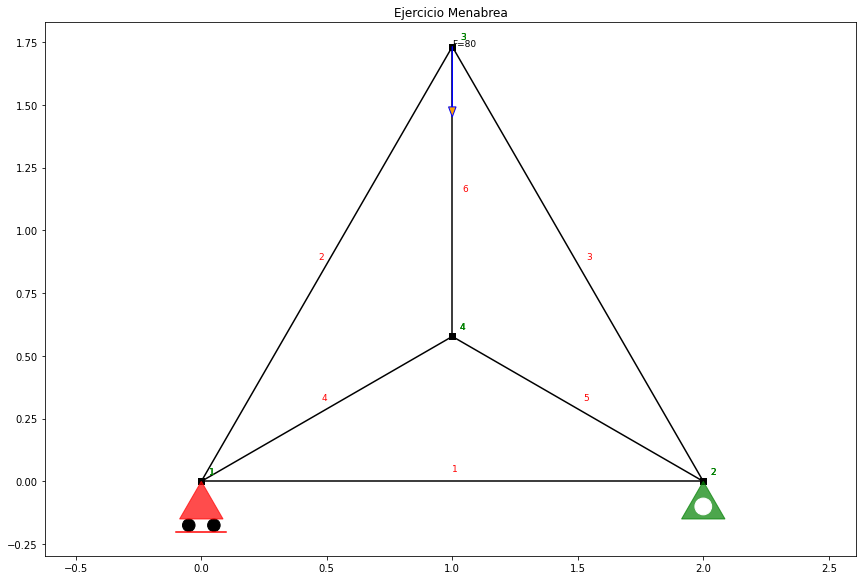

In [8]:
# Mostramos estructura generada
ss.show_structure(title='Ejercicio Menabrea')

In [9]:
# Resolvemos la estructura
ss.solve();


 
 
Nudo -> Despl. x  Despl. y
**************************************************
1  ->  -0.03004476751854611   0.0
2  ->  -0.0   0.0
3  ->  -0.015022383759273077   -0.05017094541936437
4  ->  -0.015022383759273044   -0.04212047455368898


Reacciones
***************************
*Nodo:  2
Reacción Fy:  40.0
*Nodo:  1
Reacción Fy:  40.0


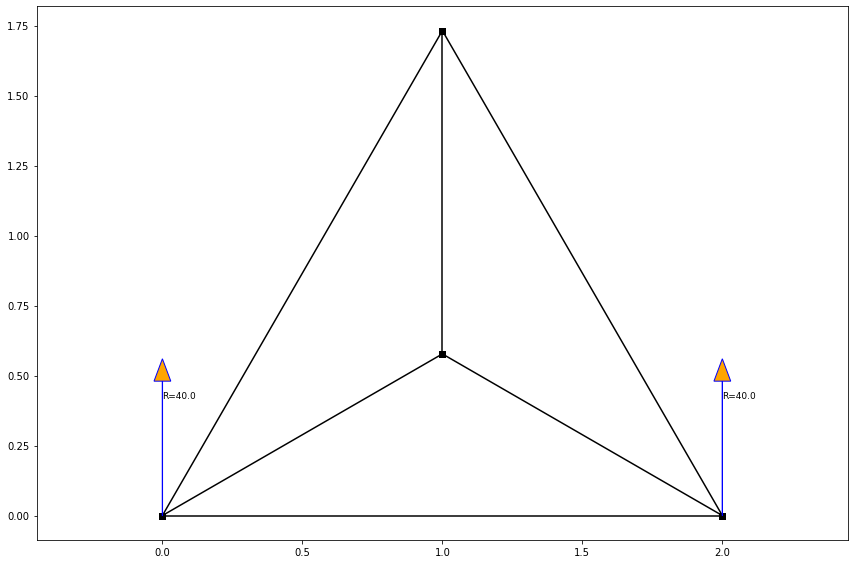

-------------------------------------------


In [10]:
# Mostramos las reacciones
ss.show_reaction_force()

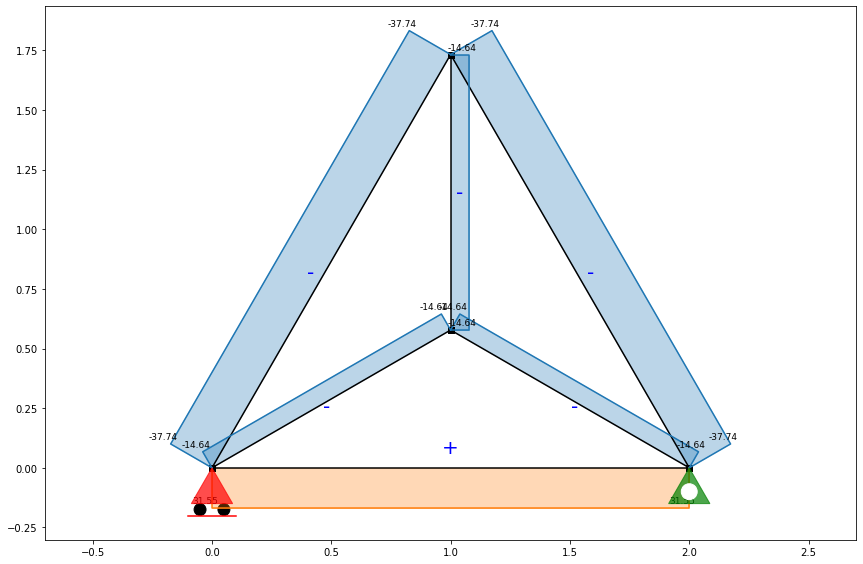

In [11]:
# Mostramos axiles
ss.show_axial_force()



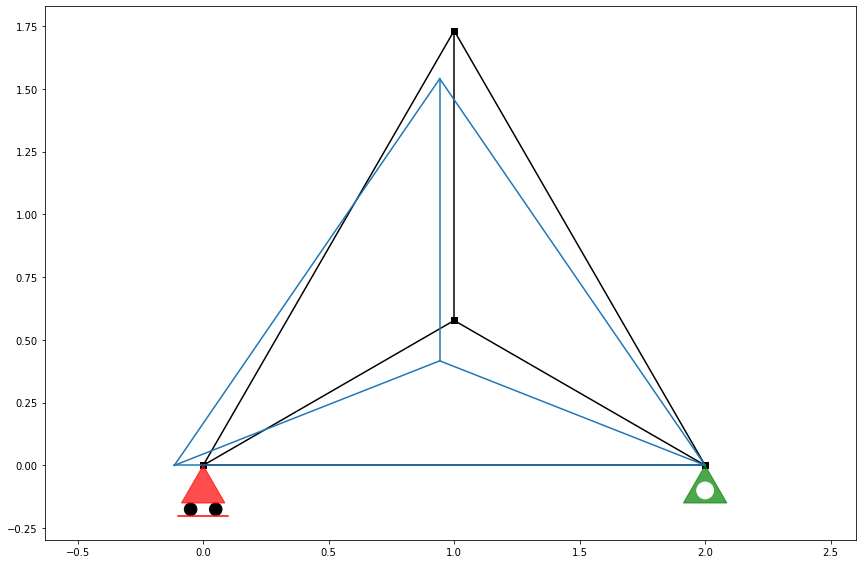

In [12]:
# Mostramos deformada
ss.show_displacement()

Reacciones
***************************
*Nodo:  1
Reacción Fx:  -3.3760443329811096e-09
*Nodo:  1
Reacción Fy:  400000.00000000605
*Nodo:  9
Reacción Fx:  1.280568540096283e-09
*Nodo:  9
Reacción Fy:  400000.0000000089


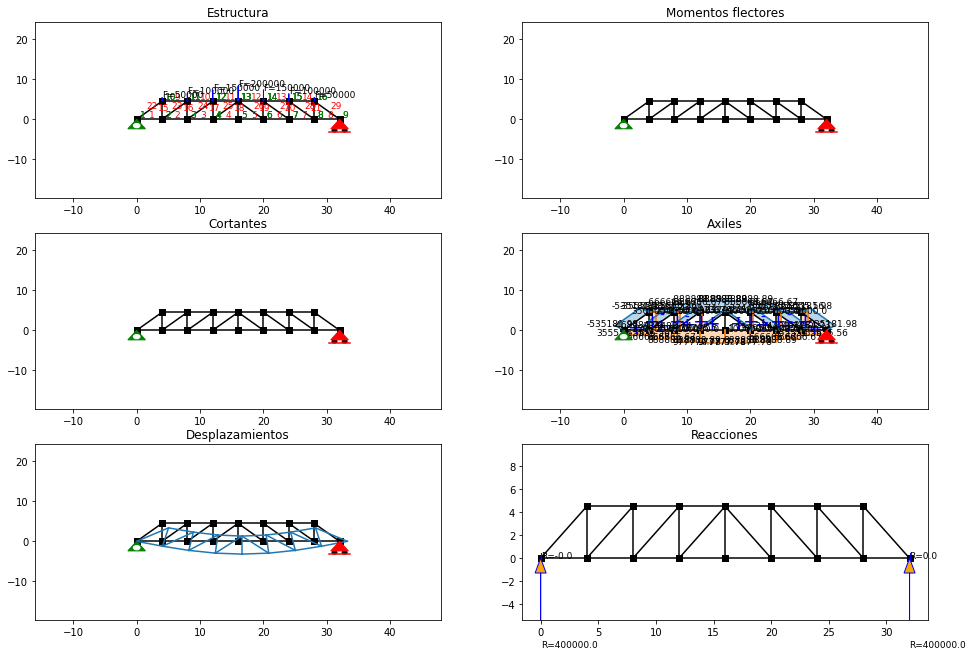

In [ ]:
# Mostramos todos los resultados juntos
ss.plotter.results_plot()